In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.colors as mcolors
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
colors = list(mcolors.CSS4_COLORS.keys())

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_house=pd.read_csv("Housing.csv")

In [6]:
df_house.shape

(545, 13)

In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df_house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
print("Columns Present: ", df_house.columns)

Columns Present:  Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [10]:
df_sum_null_app=(round((df_house.isnull().sum().T/len(df_house)*100).sort_values(ascending=False), 2))
print("Persentage of Null values in Houseing data: ")
print(df_sum_null_app)

Persentage of Null values in Houseing data: 
price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


In [11]:
df_house.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [12]:
df_house.dtypes.value_counts()

object    7
int64     6
Name: count, dtype: int64

In [13]:
df_house.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
price,545,4766729,1870439,1750000,3430000,4340000,5740000,13300000
area,545,5150,2170,1650,3600,4600,6360,16200
bedrooms,545,2,0,1,2,3,3,6
bathrooms,545,1,0,1,1,1,2,4
stories,545,1,0,1,1,2,2,4
parking,545,0,0,0,0,0,1,3


D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

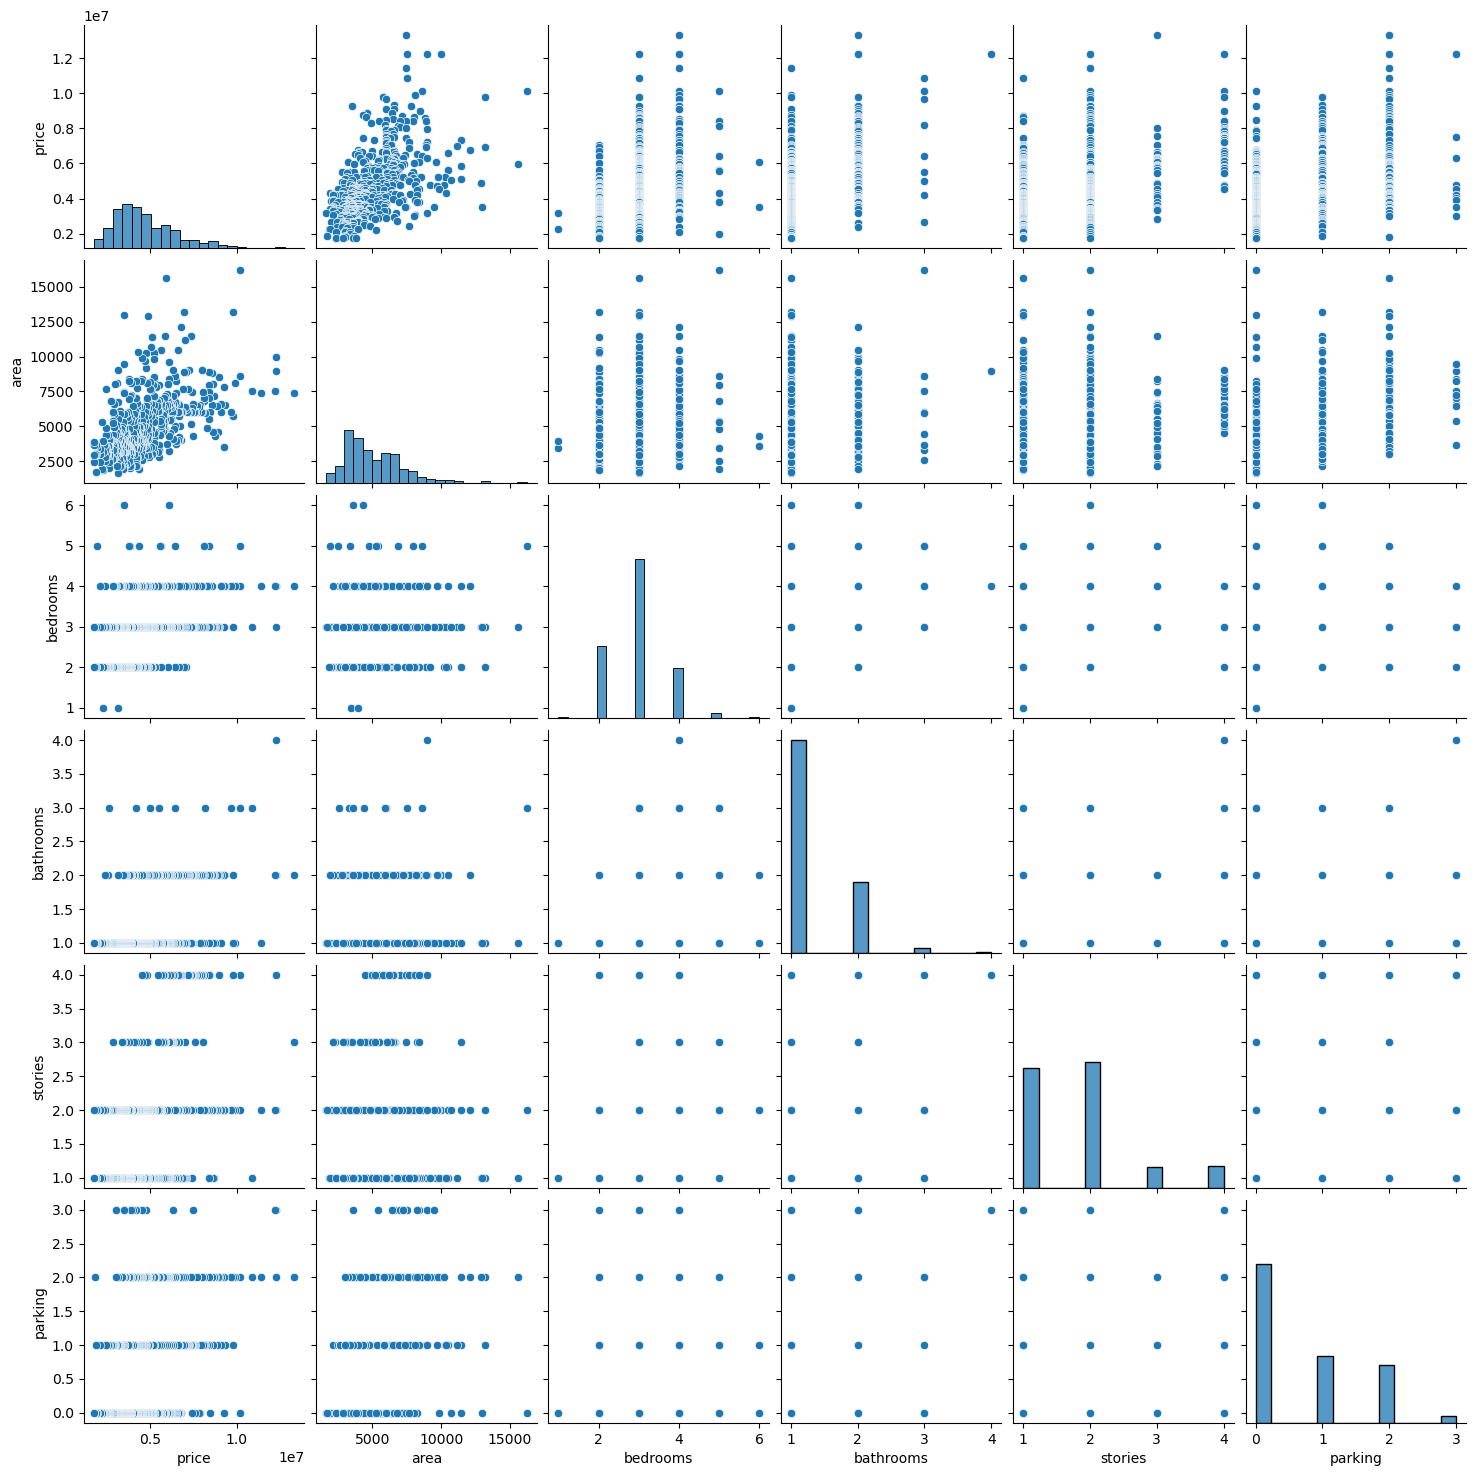

In [14]:
sns.pairplot(df_house)
plt.savefig('Multivariate_analysis for Housing - Pair Plot')
plt.show()

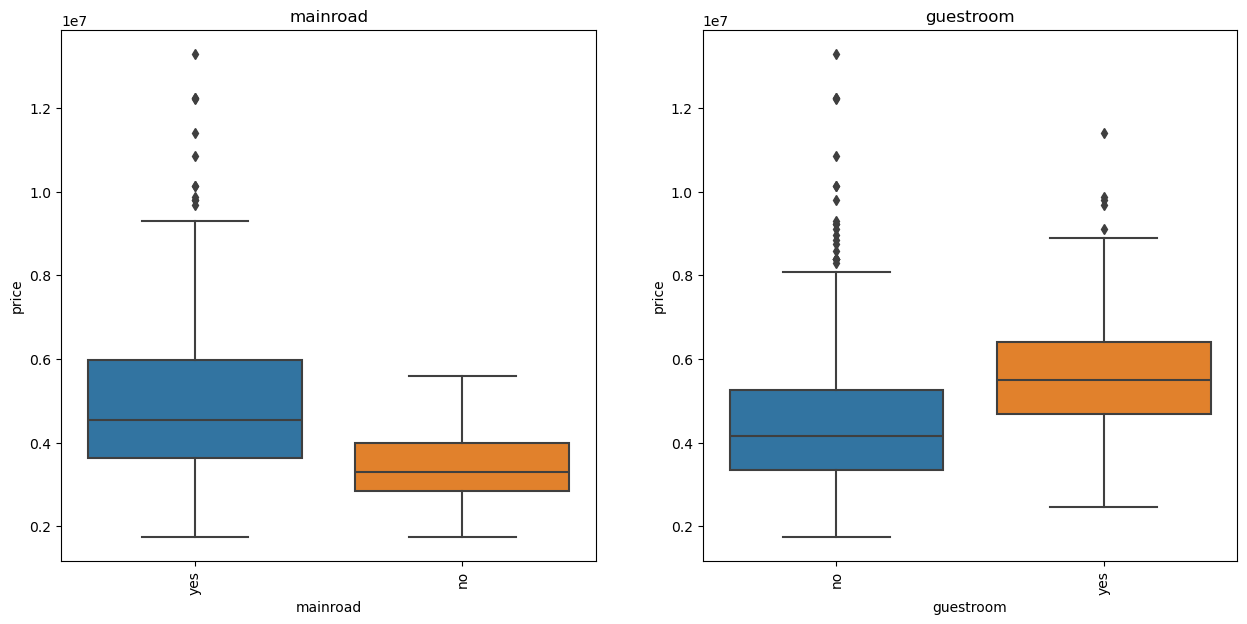

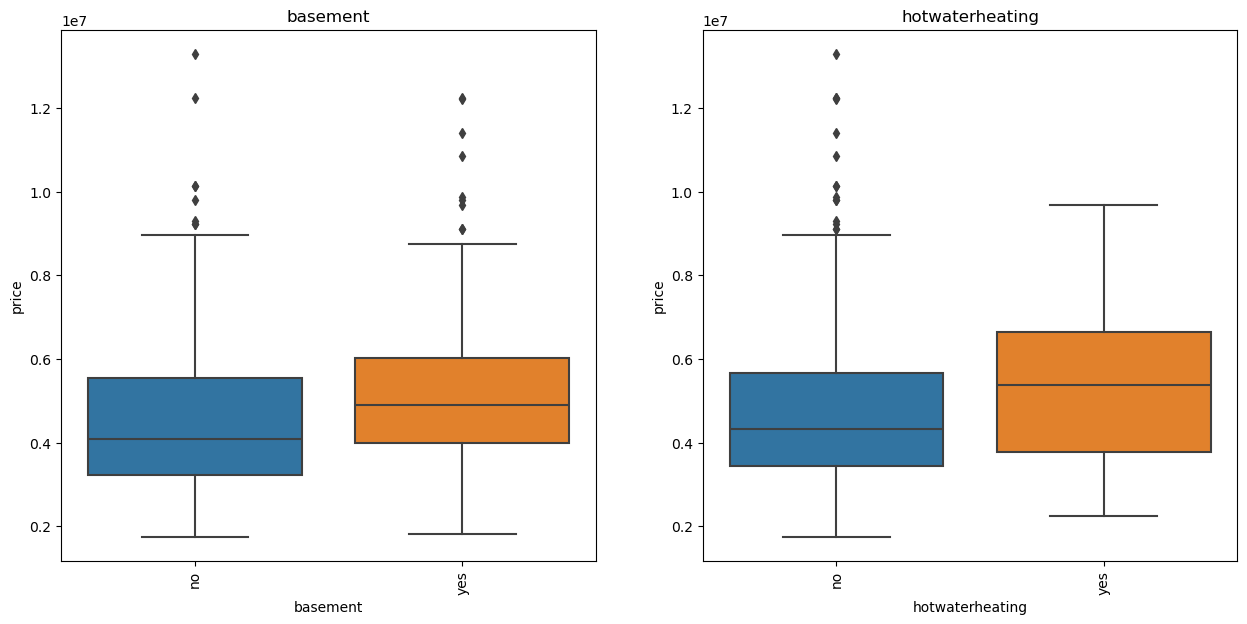

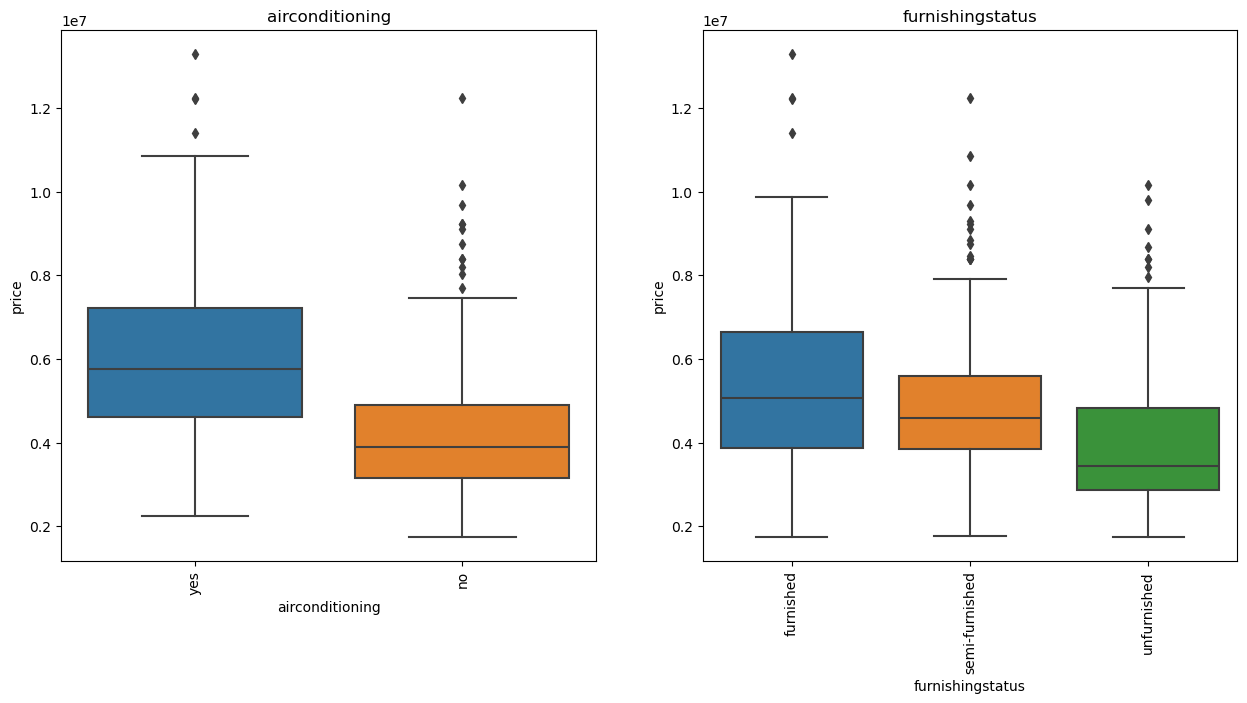

In [15]:
plt.figure(figsize=(40, 40))
plt.figure(1)

plt.subplot(5,5,1)
sns.boxplot(x='mainroad', y='price', data=df_house)
plt.title('mainroad')
plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.boxplot(x='guestroom', y='price', data=df_house)
plt.title('guestroom')
plt.xticks(rotation=90)

plt.figure(figsize=(40, 40))
plt.figure(2)

plt.subplot(5,5,1)
sns.boxplot(x='basement', y='price', data=df_house)
plt.title('basement')
plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.boxplot(x='hotwaterheating', y='price', data=df_house)
plt.title('hotwaterheating')
plt.xticks(rotation=90)

plt.figure(figsize=(40, 40))
plt.figure(3)

plt.subplot(5,5,1)
sns.boxplot(x='airconditioning', y='price', data=df_house)
plt.title('airconditioning')
plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.boxplot(x='furnishingstatus', y='price', data=df_house)
plt.title('furnishingstatus')
plt.xticks(rotation=90)

plt.savefig('univariate_analysis-1 for Houseing - Boxplot')

In [16]:
print(df_house.basement.value_counts())

basement
no     354
yes    191
Name: count, dtype: int64


In [17]:
print(df_house.guestroom.value_counts())

guestroom
no     448
yes     97
Name: count, dtype: int64


In [18]:
print(df_house.prefarea.value_counts())

prefarea
no     417
yes    128
Name: count, dtype: int64


In [19]:
print(df_house.furnishingstatus.value_counts())

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


<Axes: xlabel='furnishingstatus', ylabel='price'>

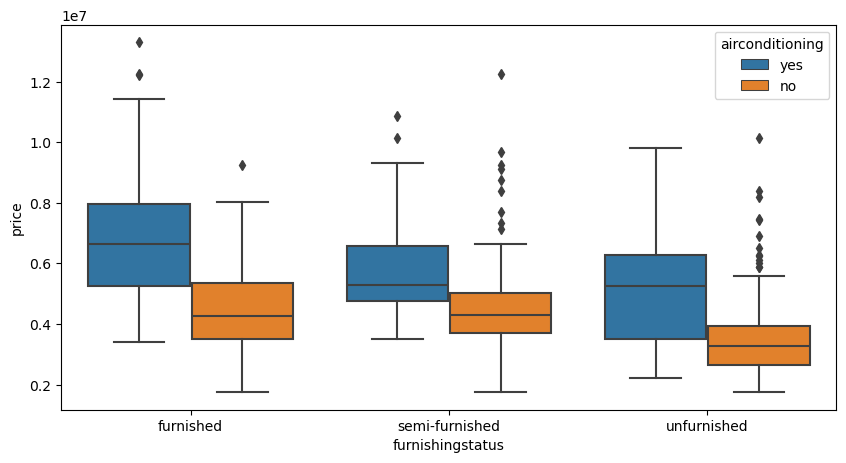

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='furnishingstatus', y='price', hue='airconditioning', data=df_house)

In [21]:
varlist=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes':1, 'no':0})

df_house[varlist]=df_house[varlist].apply(binary_map)

In [22]:
print(df_house.basement.value_counts())

basement
0    354
1    191
Name: count, dtype: int64


In [23]:
print(df_house.parking)

0      2
1      3
2      2
3      3
4      2
5      2
6      2
7      0
8      2
9      1
10     2
11     2
12     1
13     2
14     0
15     2
16     1
17     2
18     2
19     1
20     2
21     2
22     1
23     1
24     2
25     2
26     0
27     1
28     2
29     1
30     2
31     2
32     1
33     1
34     1
35     2
36     1
37     2
38     2
39     1
40     0
41     0
42     2
43     2
44     1
45     0
46     1
47     3
48     1
49     0
50     1
51     1
52     1
53     2
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     2
64     1
65     1
66     1
67     2
68     1
69     2
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     2
79     0
80     1
81     1
82     1
83     0
84     2
85     0
86     0
87     2
88     2
89     2
90     0
91     2
92     0
93     3
94     1
95     2
96     1
97     1
98     0
99     0
100    0
101    1
102    1
103    0
104    2
105    0
106    0
107    0
108    1
109    1
110    2
1

In [24]:
print(df_house.parking.value_counts())

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64


In [25]:
df_house=df_house.round(2)
df_house_encoded=pd.get_dummies(df_house, drop_first=True)

corr_mat=df_house_encoded.corr()
cm_corr=sns.light_palette("green", as_cmap=True)
cm_corr=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
corr_mat.style.background_gradient(cmap=cm_corr)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


In [26]:
df_house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [27]:
status=pd.get_dummies(df_house['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [28]:
fur=['furnished', 'semi-furnished', 'unfurnished']
def binary_map(x):
    return x.map({True:1, False:0})

status[fur]=status[fur].apply(binary_map)

In [29]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [30]:
status=pd.get_dummies(df_house['furnishingstatus'], drop_first=True)


In [31]:
status.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [32]:
df_house=pd.concat([df_house, status], axis=1)

In [33]:
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [34]:
df_house.drop(['furnishingstatus'], axis=1, inplace=True)
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [35]:
varlist=['semi-furnished', 'unfurnished']

def binary_map(x):
    return x.map({True:1, False:0})

df_house[varlist]=df_house[varlist].apply(binary_map)

In [36]:
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test=train_test_split(df_house, train_size=0.7, test_size=0.3, random_state=100)

In [38]:
scaler=MinMaxScaler()
num_vars=['area','bedrooms','bathrooms', 'stories','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.727034,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.857799,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


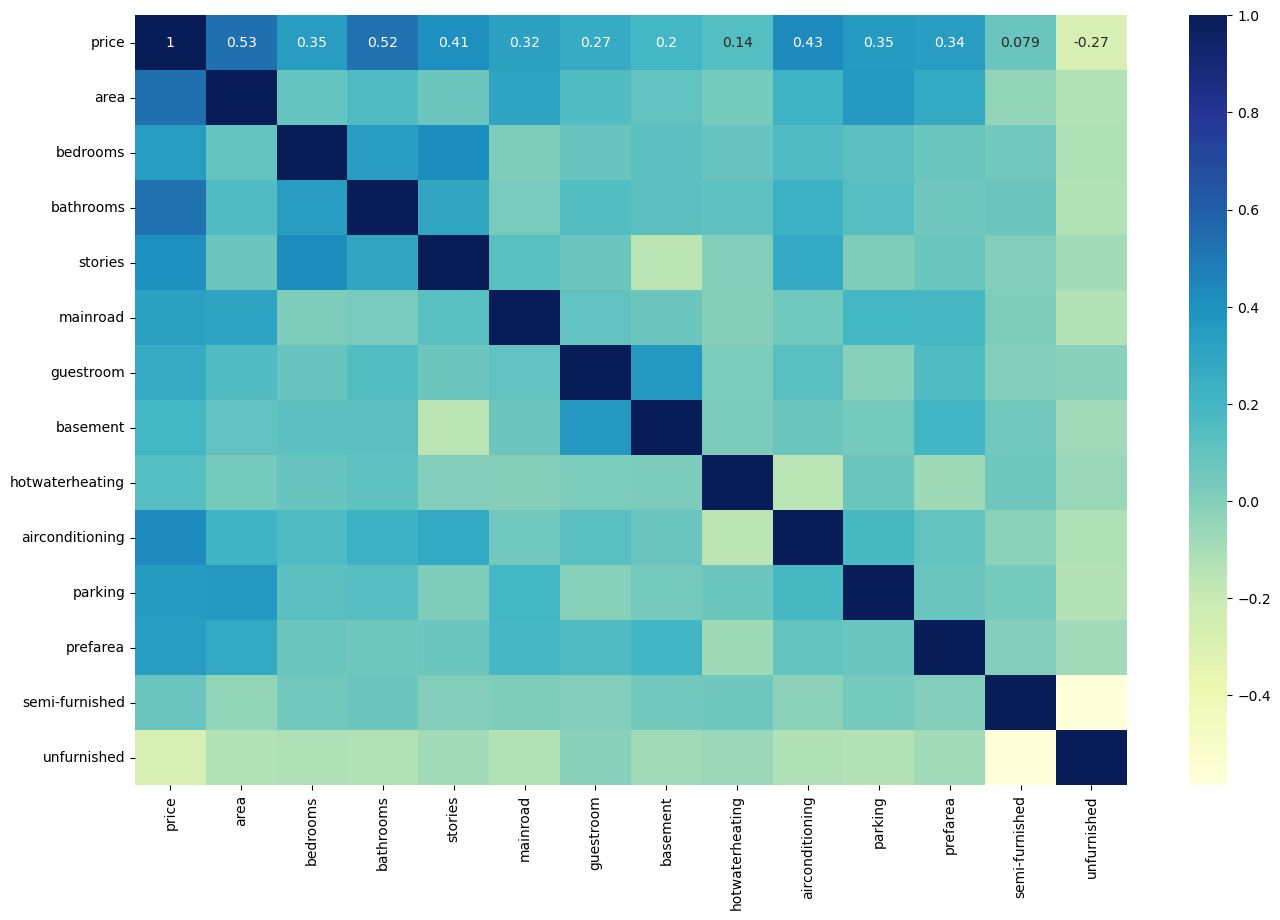

In [40]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

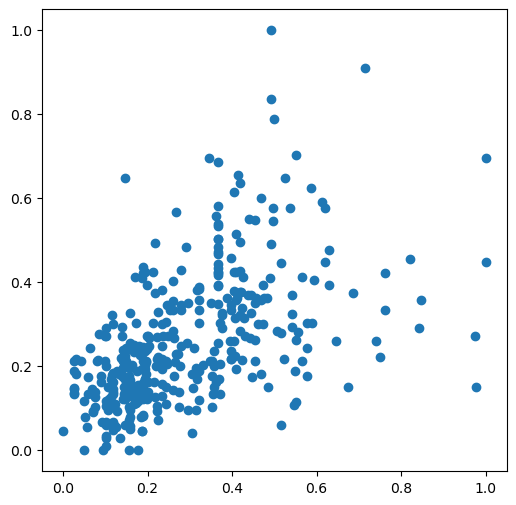

In [41]:
plt.figure(figsize = (6,6))
plt.scatter(df_train.area, df_train.price)
plt.show()

In [42]:
y_train=df_train.pop('price')
X_train=df_train

In [43]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [44]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train[['area']])
lr=sm.OLS(y_train, X_train_lm).fit()

In [45]:
lr.params

const    0.126894
area     0.462192
dtype: float64

In [46]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           3.15e-29
Time:                        12:29:36   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

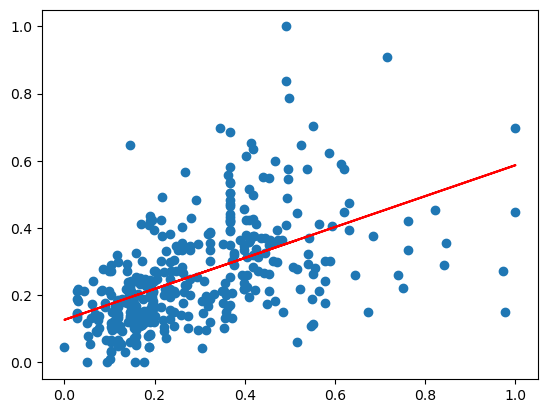

In [47]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127+0.46*X_train_lm.iloc[:, 1], 'r')

In [48]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           3.15e-29
Time:                        12:29:36   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [49]:
X_train_lm=X_train[['area', 'bathrooms']]

In [50]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_lm)
lr=sm.OLS(y_train, X_train_lm).fit()

In [51]:
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [52]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.51e-54
Time:                        12:29:36   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

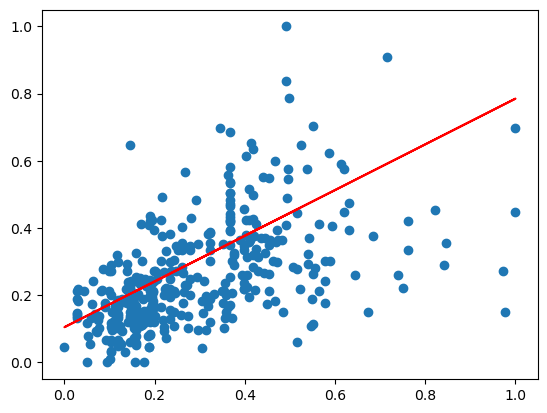

In [53]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.105+0.39*X_train_lm.iloc[:, 1] + 0.29*X_train_lm.iloc[:, 1], 'r')

In [54]:
X_train_lm=X_train[['area', 'bathrooms', 'bedrooms']]

In [55]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_lm)
lr=sm.OLS(y_train, X_train_lm).fit()

In [56]:
lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [96]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.07e-83
Time:                        12:44:41   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

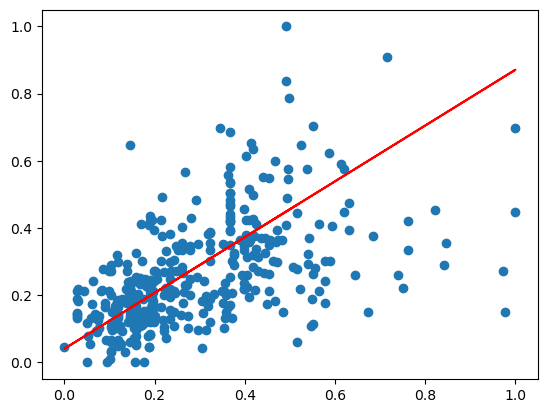

In [58]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.041+0.39*X_train_lm.iloc[:, 1] + 0.26*X_train_lm.iloc[:, 1] + 0.18*X_train_lm.iloc[:, 1] , 'r')

In [59]:
df_house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [60]:
df_new=df_house[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished']]

In [61]:
df_new.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [62]:
x_train=df_new

In [63]:
X_train_lm=X_train

In [64]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train, X_train_lm).fit()

In [65]:
lr.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.020245
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [95]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.73e-84
Time:                        12:44:26   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

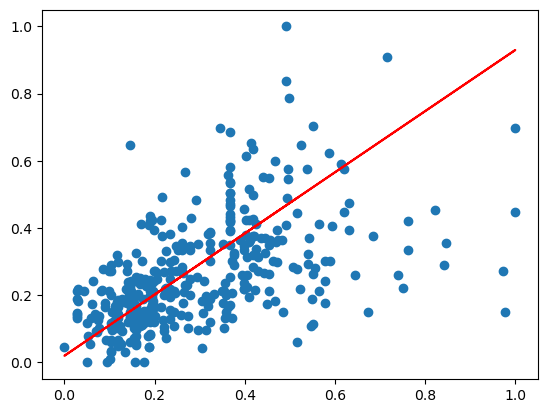

In [67]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.02+0.23*X_train_lm.iloc[:, 1] + 0.05*X_train_lm.iloc[:, 1] + 0.19*X_train_lm.iloc[:, 1] + 0.11*X_train_lm.iloc[:, 1]
         + 0.05*X_train_lm.iloc[:, 1] + 0.03*X_train_lm.iloc[:, 1] + 0.02*X_train_lm.iloc[:, 1] + 0.08*X_train_lm.iloc[:, 1] + 0.07*X_train_lm.iloc[:, 1]
         + 0.02*X_train_lm.iloc[:, 1] + 0.06*X_train_lm.iloc[:, 1], 'r')

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)

In [70]:
vif.shape

(13, 2)

In [71]:
vif.head()

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19


In [72]:
X=X_train.drop('semi-furnished', axis=1)

In [73]:
X_train_lm=sm.add_constant(X)
lr_2=sm.OLS(y_train, X_train_lm).fit()

In [74]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.07e-83
Time:                        12:29:37   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [75]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [76]:
X=X.drop('bedrooms', axis=1)

In [77]:
X_train_lm=sm.add_constant(X)
lr_3=sm.OLS(y_train, X_train_lm).fit()

In [78]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.73e-84
Time:                        12:29:37   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [79]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [80]:
y_train_price=lr_3.predict(X_train_lm)

C:\Users\Subrata\AppData\Local\Temp\ipykernel_12580\1718074553.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins=20)
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Error')

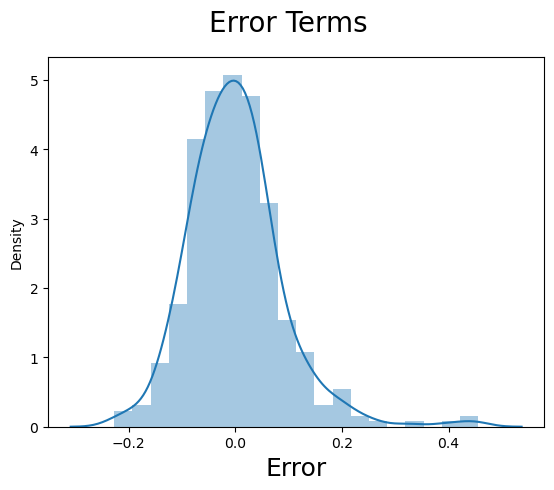

In [81]:
fig=plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Error', fontsize=18)

In [82]:
df_house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [83]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'price']

df_test[num_vars]=scaler.transform(df_test[num_vars])
print(df_test.head())
df_test[num_vars].describe()

        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
265  0.229697  0.091869       0.4        0.0  0.333333         1          0   
54   0.484848  0.366420       0.4        0.5  0.333333         1          1   
171  0.303030  0.742080       0.4        0.0  0.000000         1          0   
244  0.242424  0.306582       0.4        0.0  0.333333         1          1   
268  0.227879  0.274023       0.6        0.0  0.333333         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
265         0                0                0        0         1   
54          0                0                1        1         0   
171         0                0                0        1         1   
244         1                0                0        0         1   
268         0                0                1        0         0   

     semi-furnished  unfurnished  
265               1            0  
54                1            0  

,area,bedrooms,bathrooms,stories,price
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.298548,0.408537,0.158537,0.268293,0.263176
std,0.211922,0.147537,0.281081,0.276007,0.172077
min,-0.016367,0.200000,0.000000,0.000000,0.006061
25%,0.148011,0.400000,0.000000,0.000000,0.142424
50%,0.259724,0.400000,0.000000,0.333333,0.226061
75%,0.397439,0.400000,0.500000,0.333333,0.346970
max,1.263992,0.800000,1.500000,1.000000,0.909091


In [84]:
y_test=df_test.pop('price')
X_test=df_test

In [85]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [86]:
X_test= X_test[X_train.columns]
X_test= sm.add_constant(X_test)
y_pred = lr.predict(X_test)

In [87]:
print(r2_score(y_true=y_test, y_pred=y_pred))

0.6729582743459921


Text(0, 0.5, 'y_pred')

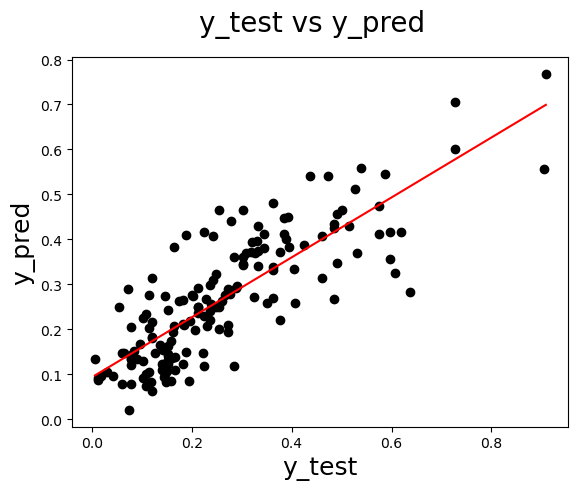

In [88]:
fig=plt.figure()
plt.scatter(y_test, y_pred, color='black')

line=np.polyfit(y_test, y_pred, 1)

predict=np.poly1d(line)

x_line=np.linspace(min(y_test), max(y_test), 100)
y_line=predict(x_line)

plt.plot(x_line, y_line, color='red')

fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)

In [89]:
X_test_m4=sm.add_constant(X_test)

In [92]:
#X_test_m4=X_test_m4.drop(['bedrooms', 'semi-furnished','basement'], axis=1)
X_test_m4=X_test_m4.drop(['bedrooms', 'semi-furnished'], axis=1)

In [93]:
y_pred_m4=lr_3.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

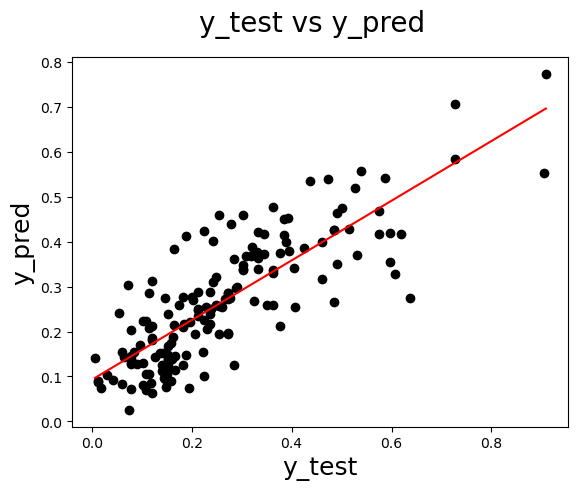

In [94]:
fig=plt.figure()
plt.scatter(y_test, y_pred_m4, color='black')

line=np.polyfit(y_test, y_pred_m4, 1)

predict=np.poly1d(line)

x_line=np.linspace(min(y_test), max(y_test), 100)
y_line=predict(x_line)

plt.plot(x_line, y_line, color='red')

fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)